<img src="Bilder/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> Applied Neural Networks | FS 2025 </b><br>
<a href="mailto:christoph.wuersch@ost.ch"> © Christoph Würsch </a> </div>
<a href="https://www.ost.ch/de/forschung-und-dienstleistungen/technik/systemtechnik/ice-institut-fuer-computational-engineering/"> Eastern Switzerland University of Applied Sciences OST | ICE </a>

[![Run in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChristophWuersch/AppliedNeuralNetworks/blob/main/ANN02/2.2._LossFunctions_ger.ipynb)

In [ ]:
# für Ausführung auf Google Colab auskommentieren und installieren
%pip install -q -r https://raw.githubusercontent.com/ChristophWuersch/AppliedNeuralNetworks/main/requirements.txt


# Verlustfunktionen in Torch

Dieses Notizbuch beschreibt und visualisiert einige der am häufigsten verwendeten Verlustfunktionen in PyTorch aus `torch.nn`. Weitere Informationen finden Sie in der [offiziellen PyTorch-Dokumentation zu Verlustfunktionen] (https://pytorch.org/docs/stable/nn.html#loss-functions).

Verlustfunktionen sind eine entscheidende Komponente beim Training neuronaler Netze, da jedes Modell für maschinelles Lernen eine Optimierung erfordert, die bei der Reduzierung des Verlustes und der Erstellung korrekter Vorhersagen hilft. Ohne Verlustfunktionen gibt es keine Möglichkeit, Ihr Modell so zu steuern, dass es korrekte Vorhersagen macht. Aber was genau sind Verlustfunktionen, und wie verwendet man sie? In diesem Notizbuch werden wir uns mit den verschiedenen Verlustfunktionen beschäftigen, die bei der Optimierung Ihrer Modelle verwendet werden können



### 1. `nn.L1Loss`

- **Beschreibung**: Berechnet den mittleren absoluten Fehler (MAE) zwischen Ziel- und vorhergesagten Werten.Die L1 -Verlustfunktion, die auch als Mittelwert für Absolute Fehler (MAE) bezeichnet wird, berechnet den Durchschnitt der Summe der absoluten Unterschiede zwischen den vorhergesagten und den tatsächlichen Werten.Es berechnet zunächst die absoluten Unterschiede zwischen den vorhergesagten und den tatsächlichen Werten und fasst dann alle Werte zusammen.Schließlich braucht es den Durchschnitt, um den Verlust zu berechnen. Der L1 -Verlust wird hauptsächlich für Regressionsprobleme verwendet und ist für Ausreißer robuster.

$$
\mathcal{L}_{\text{L1}}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

Vorteil
- MAE ist für Ausreißer robuster im Vergleich zu einem mittleren Quadratfehler (MSE), da es den absoluten Unterschied nimmt und die Auswirkungen extrem grosser Fehler verringert.
- Der MAE -Verlust ist unkompliziert zu interpretieren, da er die durchschnittliche Grösse der Fehler darstellt und die Leistung des Modells den Stakeholdern leichter vermittelt.

Nachteil
- Mae behandelt alle Fehler gleichermassen, unabhängig von ihrer Grösse.Dies kann ein Nachteil sein, wenn die Unterscheidung zwischen kleinen und grossen Fehlern wichtig ist.
- Der Gradient von MAE ist ein konstanter Wert, der die Konvergenz während der Optimierung verlangsamen kann, insbesondere im Vergleich zu MSE, wo der Gradient mit abnimmt.

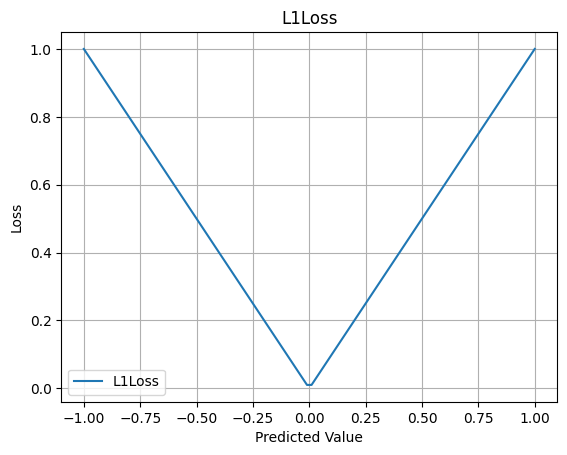

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(-1, 1, 100)
y = torch.zeros_like(x)
loss_fn = torch.nn.L1Loss()
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="L1Loss")
plt.title("L1Loss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



### 2. `nn.MSELoss`

- **Beschreibung**: Berechnet den mittleren quadratischen Fehler (MSE) zwischen Ziel- und vorhergesagten Werten. Der MSE, auch bekannt als L2-Verlust, ähnelt dem MAE-Verlust, aber anstatt die absoluten Differenzen wie bei MAE zu berechnen, berechnet L2 den Durchschnitt der quadrierten Differenzen zwischen den vorhergesagten und tatsächlichen Werten. Die Hauptidee hinter der Quadrierung besteht darin, das Modell für grosse Differenzen zu bestrafen, damit das Modell grössere Differenzen vermeidet. Diese Funktion wird auch für Regressionsprobleme verwendet, ist aber weniger robust als MAE. Sie ist die Standardverlustfunktion für die meisten Pytorch-Regressionsprobleme.



$$
\text{MSE}(y, \hat{y}) =  \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Vorteile:
- Geeignet für **Regressionsaufgaben**, bei denen das Endziel darin besteht, die quadrierten Differenzen zwischen vorhergesagten Werten und tatsächlichen Werten zu minimieren.
- Differenzierbar und konvex.

Benachteiligungen:
- **Empfindlich gegenüber Ausreissern** aufgrund der Quadrierungsoperation, die die Ergebnisse im Optimierungsprozess verfälscht.
- Nicht ideal für Aufgaben, bei denen Fehler unterschiedlich bestraft werden sollen.


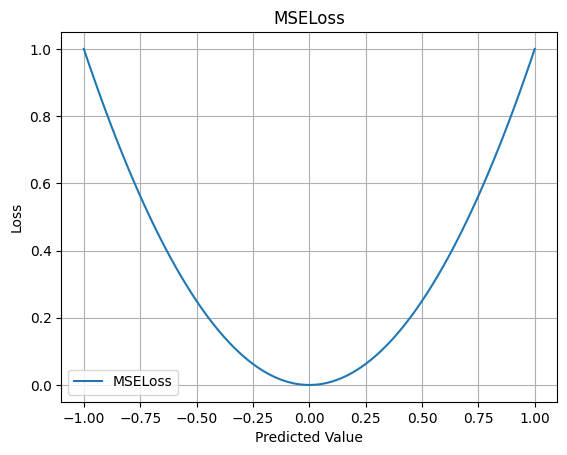

In [ ]:
x = torch.linspace(-1, 1, 100)
y = torch.zeros_like(x)
loss_fn = torch.nn.MSELoss()
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="MSELoss")
plt.title("MSELoss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


### 3. `nn.BCELoss`

- **Beschreibung**: Binärer Cross-Entropy-Verlust für binäre Klassifikationsprobleme. Dieser Verlust ist eine spezielle Klasse des Cross-Entropie-Verlustes, der für binäre Klassifizierungsprobleme verwendet wird. Der Ausgang des neuronalen Netzes ist eine Sigmoid-Schicht, die sicherstellt, dass das Endergebnis entweder ein Wert nahe Null oder nahe Eins ist. Wie der Name schon sagt, wird es für binäre Klassifizierungsaufgaben verwendet.

$$
\text{BCELoss}(y,\hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \big( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \big)
$$

Vorteile:
- Es wird häufig bei **binären Klassifizierungsproblemen** verwendet. Es hilft auch bei der Handhabung unausgeglichener Datensätze.
- Es ermutigt das Modell, hohe Wahrscheinlichkeiten für die richtige Klasse vorherzusagen.

Nachteile:
- Es kann einen verschwindenden Gradienten und eine langsame Konvergenz aufweisen, wenn die vorhergesagten Wahrscheinlichkeiten weit von den wahren Bezeichnungen entfernt sind.


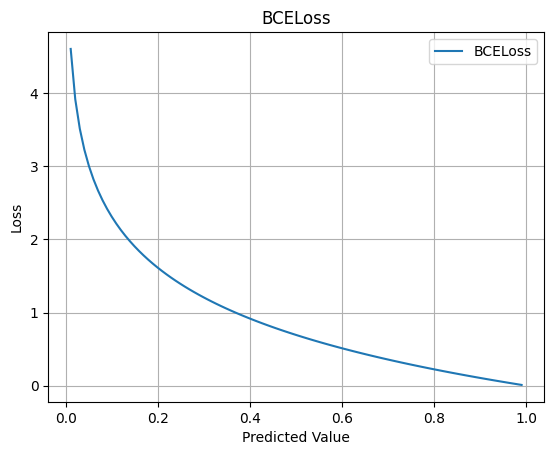

In [ ]:
x = torch.linspace(0.01, 0.99, 100)
y = torch.ones_like(x)
loss_fn = torch.nn.BCELoss()
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="BCELoss")
plt.title("BCELoss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



### 4. `nn.CrossEntropyLoss`

- **Beschreibung**: Kreuzentropieverlust für Mehrklassen-Klassifikationsprobleme. Kombiniert `nn.LogSoftmax` und `nn.NLLLoss` in einem. Die Cross-Entropie-Verlustfunktion wird bei Klassifizierungsproblemen verwendet. Diese Verlustfunktion berechnet die Unterschiede zwischen zwei Wahrscheinlichkeitsverteilungen für einen gegebenen Satz von Zufallsvariablen. Die Ausgabe des Netzes ist eine Softmax-Schicht, die sicherstellt, dass der endgültige Wahrscheinlichkeitswert im Bereich von 0 bis 1 bleibt. Sie wird bei binären Klassifizierungsaufgaben verwendet, für die sie die Standardverlustfunktion in Pytorch ist.

$$
\text{CrossEntropyLoss}(y,\hat{y}) = - \sum_{i=1}^{C} y_i \log \left( \frac{\exp(\hat{y}_i)}{\sum_{j=1}^{C} \exp(\hat{y}_j)} \right)
$$

Vorteile
- Unveränderlich gegenüber Skalierung und Verschiebung der vorhergesagten Wahrscheinlichkeiten.
- Liefert ein Maß für die Unsicherheit, das zu einem besseren Verständnis der Modellvorhersagen beiträgt.

Nachteile
- Empfindlich gegenüber Ausreißern und unausgewogenen Daten (kann zugunsten der Mehrheitsklasse verzerrt sein).
- Es liefert keine Ähnlichkeit zwischen den Klassen, was in einigen Fällen erforderlich sein kann.

In [ ]:
x = torch.tensor([[2.0, 1.0, 0.1]])
y = torch.tensor([0])  # Class 0
loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(x, y)
print("CrossEntropyLoss:", loss.item())


CrossEntropyLoss: 0.4170299470424652



### 5. `nn.HuberLoss`

- **Beschreibung**: Kombiniert L1- und L2-Verluste und reduziert die Empfindlichkeit gegenüber Ausreißern. Dieser Verlust wird bei der Lösung von Regressionsproblemen verwendet, insbesondere bei Ausreißern. Er kombiniert sowohl MAE (mittlerer absoluter Fehler) als auch MSE (mittlerer quadratischer Fehler), und welcher Verlust verwendet wird, hängt vom Delta-Wert ab. Zunächst wird die Differenz zwischen den tatsächlichen und den vorhergesagten Werten berechnet. Ist diese Differenz kleiner als der Schwellenwert, d.h. Delta, verhält es sich wie MAE, andernfalls wechselt es zu MSE.

$$
\text{HuberLoss}(y,\hat{y}) = \begin{cases}
\frac{1}{2}(\hat{y}_i - y_i)^2, & \text{if } |\hat{y}_i - y_i| \leq \delta \\
\delta |\hat{y}_i - y_i| - \frac{1}{2} \delta^2, & \text{otherwise}
\end{cases}
$$

MAE, MSE und Huber-Verluste werden bei Regressionsproblemen verwendet, aber welche sollten wir verwenden? MSE kann verwendet werden, wenn Sie größere Fehler stärker bestrafen wollen. Er ist nützlich, wenn die Daten keine signifikanten Ausreißer aufweisen und man davon ausgeht, dass die Fehler normalverteilt sind. MAE kann verwendet werden, wenn Sie eine robuste Verlustfunktion wünschen, die weniger von Ausreißern beeinflusst wird. Der Huber-Verlust kann verwendet werden, wenn man einen Kompromiss zwischen den Vorteilen von MAE und MSE finden möchte.


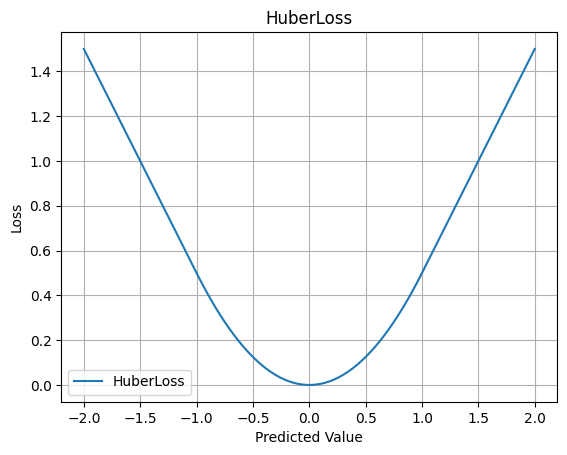

In [ ]:
x = torch.linspace(-2, 2, 100)
y = torch.zeros_like(x)
loss_fn = torch.nn.HuberLoss(delta=1.0)
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="HuberLoss")
plt.title("HuberLoss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



### 6. `nn.SoftMarginLoss`

- **Description**: A loss function for binary classification that encourages the model to predict probabilities close to 0 or 1.

$$
\text{SoftMarginLoss}(y,\hat{y}) = \frac{1}{N} \sum_{i=1}^{N} \log\big(1 + \exp(-y_i \cdot \hat{y}_i)\big)
$$


For further details, check the [official PyTorch documentation on loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions).


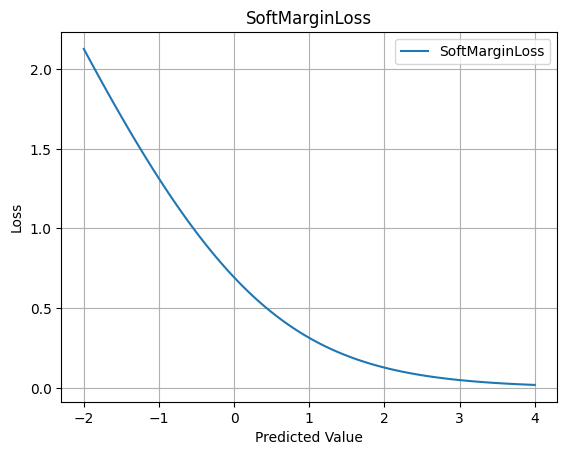

In [ ]:
x = torch.linspace(-2, 4, 100)
y = torch.ones_like(x)  # Binary target (1 for positive class)
loss_fn = torch.nn.SoftMarginLoss()
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="SoftMarginLoss")
plt.title("SoftMarginLoss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



### 7. `nn.KLDivLoss`

- **Beschreibung**: Der Kullback-Leibler-Divergenzverlust misst den Unterschied zwischen zwei Wahrscheinlichkeitsverteilungen. Der Kullback-Leibler-Divergenzverlust berechnet die Differenz zwischen zwei Wahrscheinlichkeitsverteilungen. Sie gibt an, wie groß die Divergenz ist, wenn die vorhergesagte Wahrscheinlichkeitsverteilung anstelle der Zielwahrscheinlichkeitsverteilung verwendet wird. Ist die Divergenz größer, ist auch die Verlustfunktion größer. Wenn die KL-Divergenz null ist, bedeutet dies, dass die beiden Wahrscheinlichkeitsverteilungen gleich sind. Sie wird zur Annäherung komplexer Funktionen, bei Klassifizierungsaufgaben mit mehreren Klassen und wenn Sie sicherstellen wollen, dass die Verteilung der Vorhersagen der der Trainingsdaten ähnelt, verwendet.

$$
\text{KLDivLoss}(P, Q) = \sum_{i} P(x_i) \cdot \left( \log(P(x_i)) - \log(Q(x_i)) \right)
$$

Vorteile:
- Sie misst die Differenz zwischen zwei Wahrscheinlichkeitsverteilungen und wird häufig für Aufgaben wie Variational Autoencoders (VAEs) verwendet.
- Sie wird auch beim Training generativer Modelle und beim Abgleich der jeweiligen vorhergesagten Verteilung mit der wahren Verteilung verwendet.

Nachteilig:
- Sie ist nicht symmetrisch und eignet sich nicht als eigenständige Verlustfunktion beim Training von Klassifikatoren.




In [ ]:
x = torch.tensor([0.1, 0.2, 0.7])
y = torch.tensor([0.1, 0.3, 0.6])
loss_fn = torch.nn.KLDivLoss(reduction="batchmean")
loss = loss_fn(x.log(), y)
print("KLDivLoss:", loss.item())




### 8. `nn.BCEWithLogitsLoss`

- **Description**: Combines a Sigmoid layer and the Binary Cross-Entropy loss in one. This is numerically more stable than using a plain Sigmoid followed by `nn.BCELoss`.

$$
\text{BCEWithLogitsLoss}(y,\hat{y}) = \frac{1}{N} \sum_{i=1}^{N} \big( y_i \cdot \log(\sigma(\hat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\hat{y}_i)) \big)
$$

where $\sigma(x) = \frac{1}{1 + \exp(-x)}$ is the Sigmoid function.



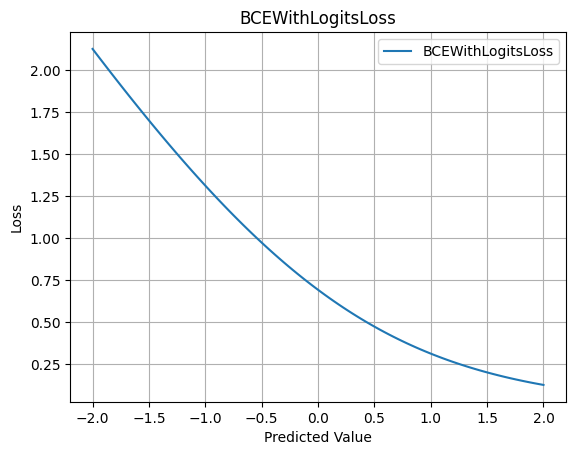

In [ ]:
x = torch.linspace(-2, 2, 100)
y = torch.ones_like(x)  # Binary target (1 for positive class)
loss_fn = torch.nn.BCEWithLogitsLoss()
losses = [loss_fn(torch.tensor([xi]), torch.tensor([yi])) for xi, yi in zip(x, y)]

plt.plot(x.numpy(), losses, label="BCEWithLogitsLoss")
plt.title("BCEWithLogitsLoss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



`BCEWithLogitsLoss` kombiniert zwei Vorgänge:
1. **Sigmoide Aktivierungsfunktion**: Konvertiert Rohwerte (Logits) in Wahrscheinlichkeiten im Bereich $[0, 1]$.
2. **Binärer Kreuz-Entropie-Verlust**: Misst die Diskrepanz zwischen den vorhergesagten Wahrscheinlichkeiten und den tatsächlichen binären Bezeichnungen.

Anstatt die Sigmoid-Funktion separat anzuwenden und anschliessend den `BCELoss` zu berechnen, wird bei `BCEWithLogitsLoss` die Sigmoid-Berechnung direkt in die Verlustfunktion integriert. Diese kombinierte Operation ist numerisch stabiler, insbesondere bei extremen Logits-Werten (sehr grosse positive oder negative Werte), wodurch das Risiko eines Über- oder Unterlaufs bei der in der Sigmoid-Funktion verwendeten Exponentialfunktion verringert wird.

- **Numerische Stabilität**: Durch die Kombination der Sigmoid- und BCE-Operationen in einer einzigen, vermeidet die Implementierung die direkte Berechnung von $ \sigma(x) $ (Sigmoid) und nutzt stattdessen mathematische Vereinfachungen, um die Stabilität zu erhalten.
- **Effizienz**: Die Durchführung beider Operationen in einem Schritt ist rechnerisch effizient.
- **Anwendbarkeit**: Es wird häufig bei binären Klassifizierungsaufgaben und bei Aufgaben mit Wahrscheinlichkeiten verwendet, bei denen die Ziele entweder 0 oder 1 sind.
- **Binäre Klassifizierungsaufgaben**: Vorhersage eines einzigen binären Ergebnisses (z. B. wahr/falsch, ja/nein).
- **Multilabel-Klassifikation**: Wenn jede Stichprobe zu mehreren unabhängigen Klassen gehören kann (verwenden Sie `BCEWithLogitsLoss` mit kodierten One-Hot- oder Multi-Hot-Zielmarken).


Der binäre Cross-Entropy Loss wird als **negative Log-Likelihood** einer Bernoulli-Verteilung abgeleitet. Für ein binäres Klassifikationsproblem:

1. **Bernoulli-Likelihood-Funktion**:
   
   Die Bernoulli-Verteilung modelliert die Wahrscheinlichkeit eines binären Ergebnisses ($y \in \{0, 1\}$):
   $$
   P(y \mid x) = \sigma(x)^y \cdot (1 - \sigma(x))^{1-y}
   $$
   Dabei ist $ \sigma(x) $ die Sigmoid-Funktion:
   $$
   \sigma(x) = \frac{1}{1 + \exp(-x)}
   $$

2. **Log-Likelihood**:
   Nehmen Sie den Logarithmus der Wahrscheinlichkeit für einen einzelnen Datenpunkt:
   $$
   \log P(y \mid x) = y \cdot \log(\sigma(x)) + (1 - y) \cdot \log(1 - \sigma(x))
   $$

3. **Negative Log-Likelihood (Verlust)**:
   Die negative Log-Likelihood für einen einzelnen Datenpunkt wird:
   $$
   \mathcal{L}(x, y) = -\left(y \cdot \log(\sigma(x)) + (1 - y) \cdot \log(1 - \sigma(x))\right)
   $$

4. **Direktes Ersetzen von $ \sigma(x) $**:
   Wenn wir anstelle von Wahrscheinlichkeiten Logits ($z = x$) eingeben:
   $$
   \mathcal{L}(z, y) = \max(z, 0) - z \cdot y + \log(1 + \exp(-|z|))
   $$
   Diese Formulierung vermeidet die direkte Berechnung der Sigmoid-Funktion, die für grosse Werte von $z$ instabil sein kann.



**Vorteile der Verwendung von Logits**
- **Numerische Stabilität**: Die direkte Berechnung von Sigmoid-Werten für grosse Logits kann zu einem Über- oder Unterlauf führen. Die alternative Formulierung oben entschärft dies durch die Verwendung von $\log(1 + \exp(-|z|))$, die für grosse positive oder negative Werte von $z$ stabil ist.
- **Interpretierbarkeit**: Die Verwendung von Logits ermöglicht eine klare Interpretation der Modellergebnisse als Rohwerte, die später bei Bedarf in Wahrscheinlichkeiten umgewandelt werden können.
